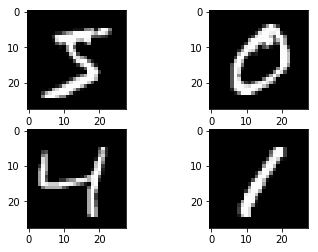

In [37]:
# Plot ad hoc mnist instances

from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [38]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [39]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [40]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [41]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores= model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
#print(scores)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 17s - loss: 0.3717 - acc: 0.8876 - val_loss: 0.1605 - val_acc: 0.9518
Epoch 2/30
 - 12s - loss: 0.1692 - acc: 0.9499 - val_loss: 0.1124 - val_acc: 0.9660
Epoch 3/30
 - 12s - loss: 0.1284 - acc: 0.9619 - val_loss: 0.0889 - val_acc: 0.9737
Epoch 4/30
 - 12s - loss: 0.1063 - acc: 0.9683 - val_loss: 0.0780 - val_acc: 0.9752
Epoch 5/30
 - 12s - loss: 0.0898 - acc: 0.9726 - val_loss: 0.0729 - val_acc: 0.9768
Epoch 6/30
 - 11s - loss: 0.0788 - acc: 0.9756 - val_loss: 0.0646 - val_acc: 0.9795
Epoch 7/30
 - 12s - loss: 0.0704 - acc: 0.9779 - val_loss: 0.0628 - val_acc: 0.9801
Epoch 8/30
 - 12s - loss: 0.0631 - acc: 0.9804 - val_loss: 0.0615 - val_acc: 0.9807
Epoch 9/30
 - 12s - loss: 0.0583 - acc: 0.9813 - val_loss: 0.0586 - val_acc: 0.9827
Epoch 10/30
 - 12s - loss: 0.0552 - acc: 0.9829 - val_loss: 0.0597 - val_acc: 0.9814
Epoch 11/30
 - 12s - loss: 0.0498 - acc: 0.9839 - val_loss: 0.0537 - val_acc: 0.9835
Epoch 12/30
 - 12s - los

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [43]:
#model.metrics_names
print(scores)

[0.0619355271241182, 0.9847]


In [44]:
history.history.keys()

dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])

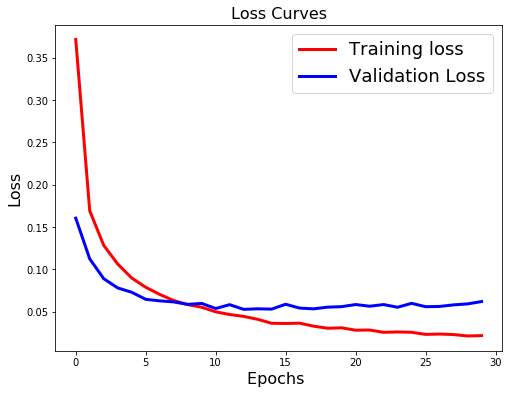

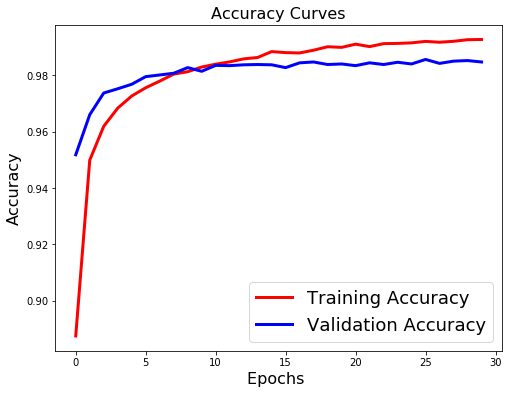

In [45]:
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

#Plot the Loss Curves
plt1.figure(figsize=[8,6])
plt1.plot(history.history['loss'],'r',linewidth=3.0)
plt1.plot(history.history['val_loss'],'b',linewidth=3.0)
plt1.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt1.xlabel('Epochs ',fontsize=16)
plt1.ylabel('Loss',fontsize=16)
plt1.title('Loss Curves',fontsize=16)
plt1.show()

#Plot the Accuracy Curves
plt2.figure(figsize=[8,6])
plt2.plot(history.history['acc'],'r',linewidth=3.0)
plt2.plot(history.history['val_acc'],'b',linewidth=3.0)
plt2.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt2.xlabel('Epochs ',fontsize=16)
plt2.ylabel('Accuracy',fontsize=16)
plt2.title('Accuracy Curves',fontsize=16)
plt2.show()